<a href="https://colab.research.google.com/github/Aashritha978/Air-quality-of-indian-cities/blob/main/Air_Quality_of_Indian_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

df = pd.read_csv('city_day.csv')  # replace with actual name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [10]:

threshold = len(df) * 0.5
df = df.loc[:, df.isnull().sum() < threshold]
df.fillna(df.mean(numeric_only=True), inplace=True)
df.dropna(subset=['Date', 'City'], inplace=True)


/tmp/ipython-input-10-2652005179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(numeric_only=True), inplace=True)
/tmp/ipython-input-10-2652005179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Date', 'City'], inplace=True)


In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)


In [12]:
df['City'] = df['City'].str.strip().str.title()

In [13]:
df.drop_duplicates(inplace=True)


In [14]:

df['PM2.5'] = df['PM2.5'].clip(upper=500)


Line Plot – PM2.5 Trend Over Time (Hyderabad)



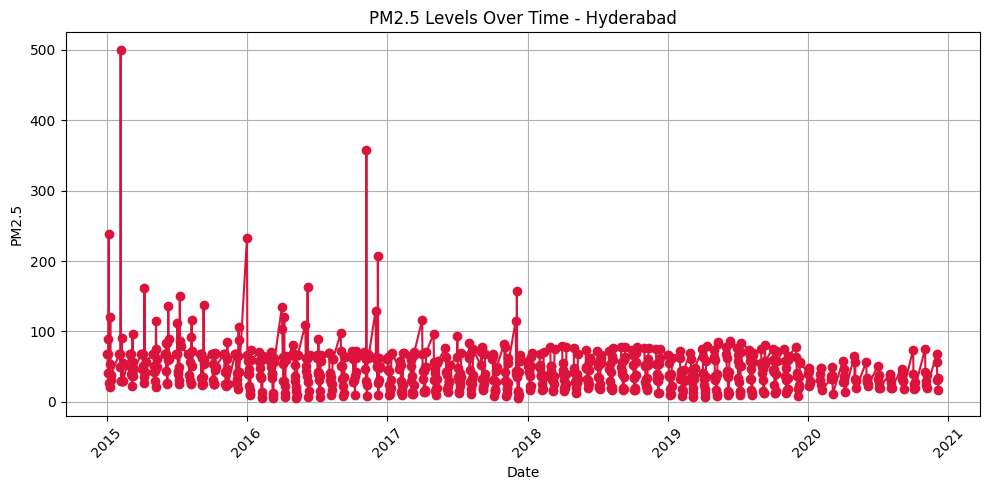

In [15]:
hyderabad_df = df[df['City'] == 'Hyderabad'].sort_values('Date')
plt.figure(figsize=(10, 5))
plt.plot(hyderabad_df['Date'], hyderabad_df['PM2.5'], marker='o', color='crimson')
plt.title('PM2.5 Levels Over Time - Hyderabad')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bar Plot – Top 5 Cities by Average PM2.5



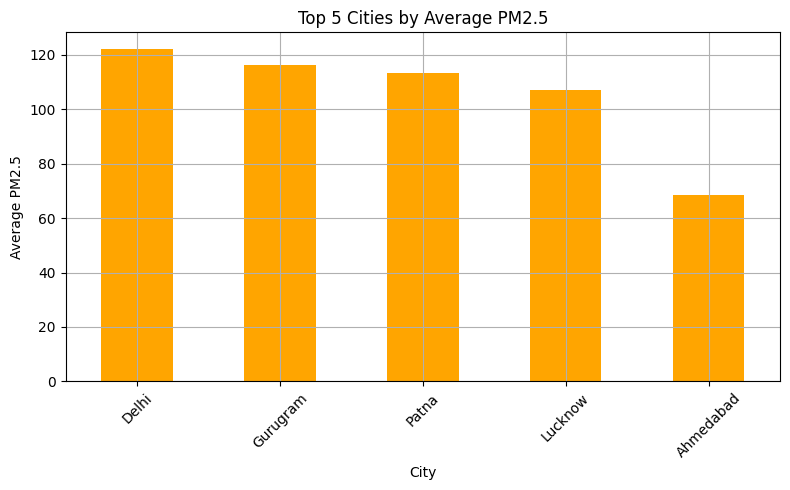

In [16]:
city_avg_pm25 = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
city_avg_pm25.plot(kind='bar', color='orange')
plt.title('Top 5 Cities by Average PM2.5')
plt.xlabel('City')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


 Heatmap – Correlation Between Pollutants


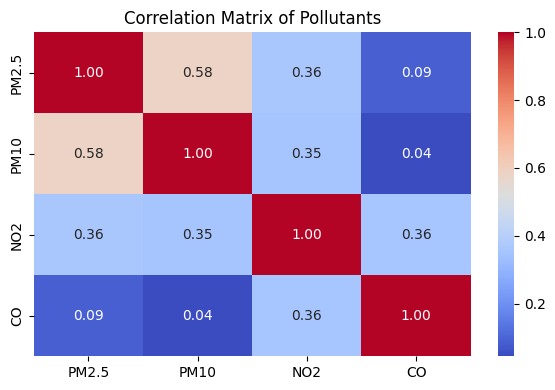

In [17]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO']
plt.figure(figsize=(6, 4))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.show()


 Boxplot – Distribution of PM2.5 by City



/tmp/ipython-input-18-3721886145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_cities_df, x='City', y='PM2.5', palette='Set2')


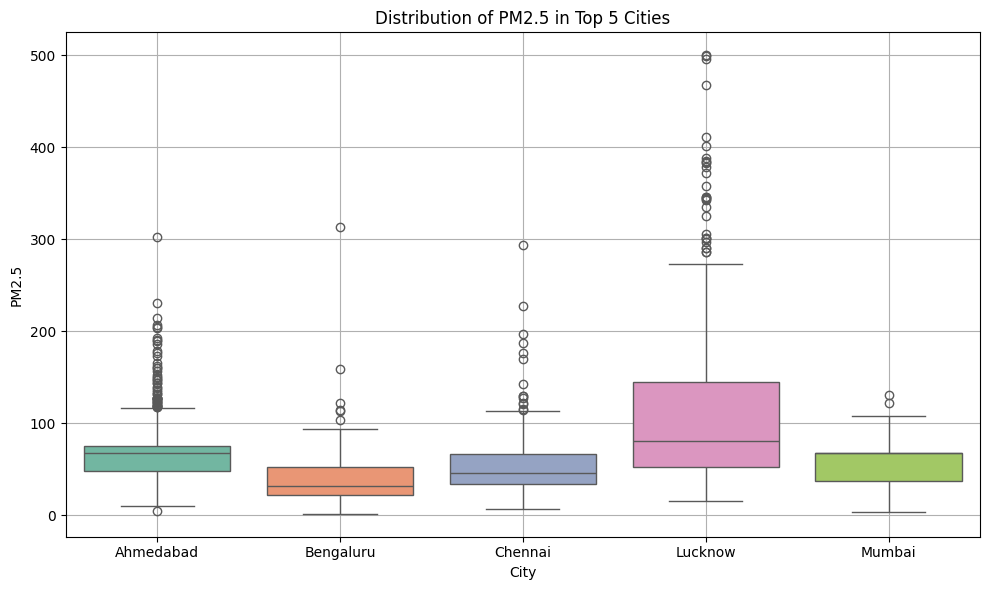

In [18]:
top_cities = df['City'].value_counts().head(5).index.tolist()
top_cities_df = df[df['City'].isin(top_cities)]

plt.figure(figsize=(10,6))
sns.boxplot(data=top_cities_df, x='City', y='PM2.5', palette='Set2')
plt.title('Distribution of PM2.5 in Top 5 Cities')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()


Pie Chart – Contribution of Cities to Total PM2.5



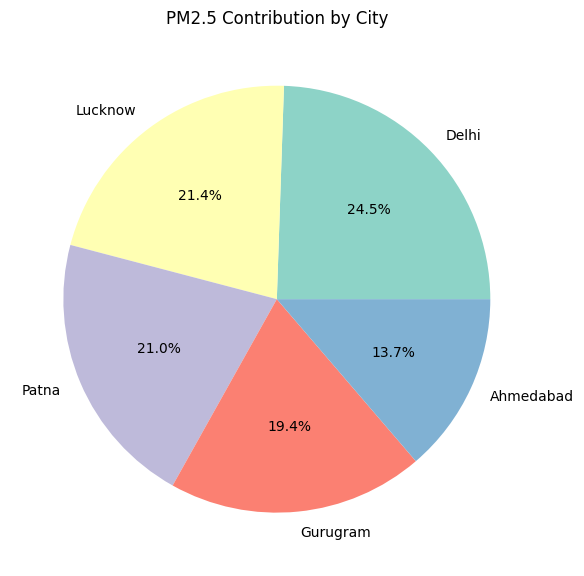

In [19]:
top_cities_total = df.groupby('City')['PM2.5'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6,6))
plt.pie(top_cities_total, labels=top_cities_total.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('PM2.5 Contribution by City')
plt.tight_layout()
plt.show()
